# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's login to our HF account to access the Inference API

In [1]:
import os
from huggingface_hub import login

login(new_session=False, token=os.getenv("HF_TOKEN"))

user = !huggingface-cli whoami
username = user[0]
print(f"Logged in as: {username}")

Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


Logged in as: gperdrizet


## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [2]:
from smolagents import CodeAgent, InferenceClientModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=InferenceClientModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 1.23 seconds| Input tokens: 2,053 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 2: Duration 2.05 seconds| Input tokens: 4,269 | Output tokens: 215]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  final_answer("Gotham Catering Co.")                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 3: Duration 1.52 seconds| Input tokens: 6,732 | Output tokens: 294]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [3]:
from smolagents import Tool, CodeAgent, InferenceClientModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=InferenceClientModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 1: Duration 1.16 seconds| Input tokens: 2,088 | Output tokens: 74]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 2: Duration 1.19 seconds| Input tokens: 4,361 | Output tokens: 153]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  print(superhero_party_theme_generator(category="villain masquerade"))                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 3: Duration 1.01 seconds| Input tokens: 6,824 | Output tokens: 217]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out: None

[Step 4: Duration 2.13 seconds| Input tokens: 9,445 | Output tokens: 370]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  villain_masquerade_theme = superhero_party_theme_generator(category="villain masquerade")                        
  print(villain_masquerade_theme)                                                                                  
                                                                                                                   
  final_answer("Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.")      
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 5: Duration 2.05 seconds| Input tokens: 12,329 | Output tokens: 521]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [4]:
party_theme_tool.push_to_hub(f"{username}/catering_service_tool", token=os.environ["HF_TOKEN"])

README.md:   0%|          | 0.00/270 [00:00<?, ?B/s]

No files have been modified since last commit. Skipping to prevent empty commit.
No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/spaces/gperdrizet/catering_service_tool/commit/b211b1d2dbf569675c4ca21ac3b7e4138b4c1c57', commit_message='Upload tool', commit_description='', oid='b211b1d2dbf569675c4ca21ac3b7e4138b4c1c57', pr_url=None, repo_url=RepoUrl('https://huggingface.co/spaces/gperdrizet/catering_service_tool', endpoint='https://huggingface.co', repo_type='space', repo_id='gperdrizet/catering_service_tool'), pr_revision=None, pr_num=None)

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.                 │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  prompt = "A luxurious superhero-themed party at Wayne Manor with made-up superheroes. The party is grand and     
  opulent, with chandeliers, red carpet, and elegant decorations. The made-up superheroes are wearing colorful,    
  futuristic costumes and are having a great time. The scene includes a dance floor, a bar with a mixologist, and  
  a buffet table with gourmet food. The atmosphere is festive and exciting, with a touch of mystery and glamour."  
  image = image_generator(prompt)                                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D86141D59D0>

[Step 1: Duration 3.81 seconds| Input tokens: 2,083 | Output tokens: 153]

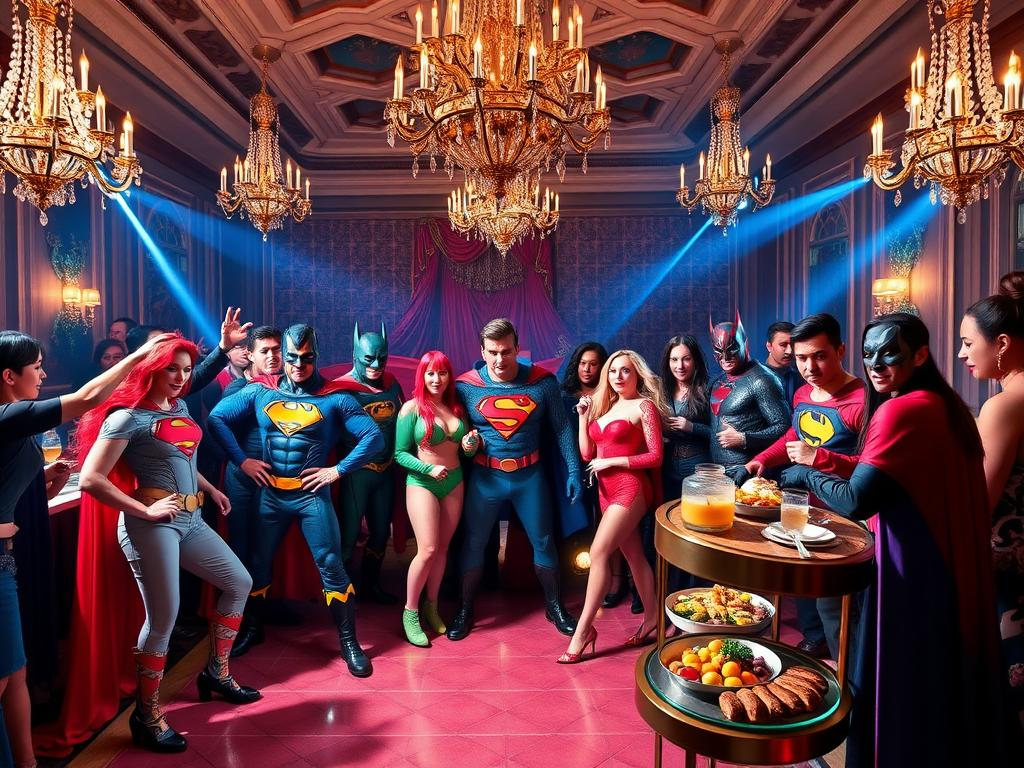

In [5]:
from smolagents import load_tool, CodeAgent, InferenceClientModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=InferenceClientModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with made-up superheros.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

tool.py:   0%|          | 0.00/635 [00:00<?, ?B/s]

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improving the prompt                                                                                           
  improved_prompt = "A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. The   
  room is filled with high-tech gadgets, colorful balloons, and superhero-themed decorations. Alfred is elegantly  
  dressed in a butler's suit, standing by a large buffet table with an array of gourmet foods. The guests are      
  dressed in superhero costumes, enjoying the festivities and engaging in lively conversations. The atmosphere is  
  vibrant and electric, with a mix of modern and classic elements reflecting the grandeur of Wayne Manor."         
                                                                                                                   
  # Printing the improved prompt for reference                                                                     
  print(improved_prompt)                                                                                           
                                                                                                                   
  # Generating the image                                                                                           
  image = image_generator(improved_prompt)                                                                         
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala. The room is filled with 
high-tech gadgets, colorful balloons, and superhero-themed decorations. Alfred is elegantly dressed in a butler's 
suit, standing by a large buffet table with an array of gourmet foods. The guests are dressed in superhero 
costumes, enjoying the festivities and engaging in lively conversations. The atmosphere is vibrant and electric, 
with a mix of modern and classic elements reflecting the grandeur of Wayne Manor.

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D85FED08E10>

[Step 1: Duration 5.98 seconds| Input tokens: 2,121 | Output tokens: 319]

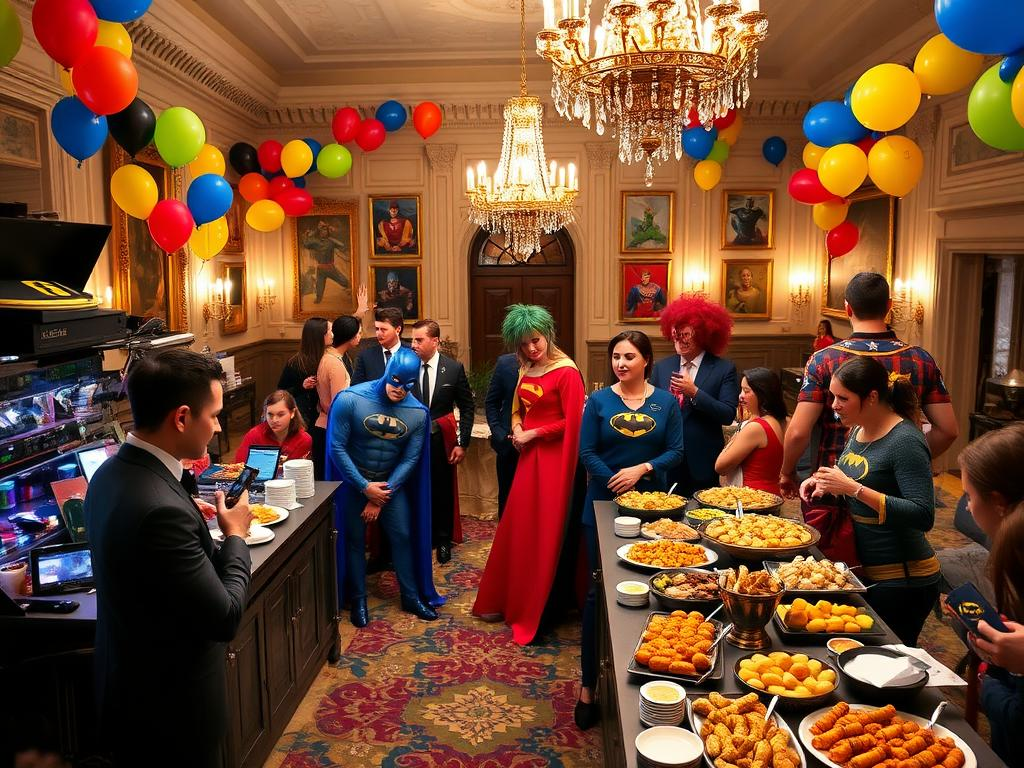

In [6]:
from smolagents import CodeAgent, InferenceClientModel, Tool, load_tool

image_generation_tool = load_tool("agents-course/text-to-image", trust_remote_code=True)

model = InferenceClientModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

## Importing a LangChain Tool

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [9]:
from langchain.agents import load_tools
from smolagents import CodeAgent, InferenceClientModel, Tool

search_tool = Tool.from_langchain(load_tools(["ddg-search"])[0])

agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ InferenceClientModel - Qwen/Qwen2.5-Coder-32B-Instruct ────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  entertainment_ideas = duckduckgo_search(query="luxury entertainment ideas for superhero-themed event")           
  print(entertainment_ideas)                                                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Unleash your inner hero with our ultimate guide to hosting an unforgettable superhero-themed party for adults! 
Explore creative costume ideas, vibrant decorations, and mouthwatering themed snacks and drinks. Engage your guests
with fun activities like trivia, costume contests, and movie screenings. Follow our planning tips to create a 
cohesive, memorable experience that your friends will rave ... For party supplies, you can't go wrong with 
Avengers-themed plates, cups, and napkins. Look for banners, balloons, and even superhero-themed tablecloths to 
pull everything together. Want an extra-special touch? Set up a snack table labeled "Fuel for Heroes," complete 
with colorful treats and themed signs. Decorations and Setting the Scene Transport your guests to a magical Arabian
oasis with this opulent and exotic high-end party theme. From sumptuous fabrics to ornate cushions and low-seating 
arrangements such as pouffes and ottomans, every detail will exude grandeur and elegance. Create a luxurious 
atmosphere with vibrant colours, intricate patterns, and lavish decor elements worthy of Middle Eastern royalty. 
While all ages may enjoy a photo booth or watching a movie, kids' activities could include pinning the mask on the 
superhero, The Flash races, and other superhero-themed kids' party games. Adult superhero parties might opt for 
events like superhero trivia, a costume contest, or a Hawkeye-themed shooting game. (Stack cups to hit with Nerf 
darts ... Marvel Party Ideas: Superhero-Themed Fun for Kids and Adults. If you've got a little hero (or a grown-up 
one) with a big imagination and an even bigger love for Marvel, a superhero-themed party is the perfect way to make
their day unforgettable. Whether it's Spider-Man swinging in for some web-slinging action or the whole Avengers 
team assembling for birthday fun, there's something ...

Out: None

[Step 1: Duration 2.02 seconds| Input tokens: 2,066 | Output tokens: 78]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  entertainment_ideas_refined = duckduckgo_search(query="luxury live performances and interactive experiences for  
  superhero-themed event")                                                                                         
  print(entertainment_ideas_refined)                                                                               
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
With fine dining, high-end cocktails, live DJs, and expansive views of the ocean, this event offers a unique fusion
of luxury, excitement, and leisure. 15. Luxury Safari or Adventure Travel Events - An unmatched combination of 
luxury and excitement can be found in a VIP safari or adventure vacation for those seeking an exceptional 
experience ... 7. Silent Disco & Personalized Audio Experiences. For luxury events that prioritize versatility and 
engagement: Silent disco headphones allow guests to switch between multiple DJs or music styles. Personalized audio
zones provide different music styles in various areas. 3D surround sound experiences enhance live performances. 
Unleash your inner hero with our ultimate guide to hosting an unforgettable superhero-themed party for adults! 
Explore creative costume ideas, vibrant decorations, and mouthwatering themed snacks and drinks. Engage your guests
with fun activities like trivia, costume contests, and movie screenings. Follow our planning tips to create a 
cohesive, memorable experience that your friends will rave ... High-end clients are blending virtual elements with 
live entertainment to create unique, interactive experiences that reach wider audiences. Trend insight: A VIP 
songwriter concert streamed to international offices or exclusive digital meet-and-greets with artists allows for 
broader engagement without compromising the luxury experience. Whether it's a live performance or an interactive 
meet-and-greet, these moments stay with your guests. Imagine your attendees mingling with a star like Mark McGrath 
or being treated to a performance of their favorite hits—it's the kind of memory that stays long after the event. 
Customizable Experiences

Out: None

[Step 2: Duration 2.13 seconds| Input tokens: 4,666 | Output tokens: 158]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 3 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  entertainment_ideas_superhero = duckduckgo_search(query="superhero-themed live performances and interactive      
  experiences")                                                                                                    
  print(entertainment_ideas_superhero)                                                                             
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'entertainment_ideas_superhero = duckduckgo_search(query="superhero-themed live 
performances and interactive experiences")' due to: DuckDuckGoSearchException: https://html.duckduckgo.com/html 202
Ratelimit

[Step 3: Duration 2.90 seconds| Input tokens: 7,747 | Output tokens: 302]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 4 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  live_performances = duckduckgo_search(query="superhero-themed live performances")                                
  interactive_experiences = duckduckgo_search(query="superhero-themed interactive experiences")                    
  print("Live Performances:", live_performances)                                                                   
  print("Interactive Experiences:", interactive_experiences)                                                       
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'live_performances = duckduckgo_search(query="superhero-themed live performances")' 
due to: DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

[Step 4: Duration 3.47 seconds| Input tokens: 11,140 | Output tokens: 498]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 5 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  general_search = duckduckgo_search(query="luxury entertainment ideas for events")                                
  print(general_search)                                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'general_search = duckduckgo_search(query="luxury entertainment ideas for events")' 
due to: DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

[Step 5: Duration 2.62 seconds| Input tokens: 14,919 | Output tokens: 625]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 6 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  specific_search = duckduckgo_search(query="superhero-themed luxury entertainment")                               
  print(specific_search)                                                                                           
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Code execution failed at line 'specific_search = duckduckgo_search(query="superhero-themed luxury entertainment")' 
due to: DuckDuckGoSearchException: https://html.duckduckgo.com/html 202 Ratelimit

[Step 6: Duration 3.24 seconds| Input tokens: 18,978 | Output tokens: 801]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 7 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  luxury_entertainment_ideas = [                                                                                   
      "Live superhero-themed musical performances",                                                                
      "Interactive superhero training camps",                                                                      
      "VIP meet-and-greets with actors from superhero movies",                                                     
      "Luxury photo booths with superhero props",                                                                  
      "Superhero-themed gourmet food stations",                                                                    
      "High-end cocktails with superhero-themed garnishes",                                                        
      "Silent disco with superhero-themed playlists",                                                              
      "3D surround sound experiences for superhero movie screenings",                                              
      "Customizable virtual reality superhero adventures",                                                         
      "Luxury superhero-themed photo and video booths"                                                             
  ]                                                                                                                
                                                                                                                   
  print(luxury_entertainment_ideas)                                                                                
                                                                                                                   
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
['Live superhero-themed musical performances', 'Interactive superhero training camps', 'VIP meet-and-greets with 
actors from superhero movies', 'Luxury photo booths with superhero props', 'Superhero-themed gourmet food 
stations', 'High-end cocktails with superhero-themed garnishes', 'Silent disco with superhero-themed playlists', 
'3D surround sound experiences for superhero movie screenings', 'Customizable virtual reality superhero 
adventures', 'Luxury superhero-themed photo and video booths']

Out - Final answer: ['Live superhero-themed musical performances', 'Interactive superhero training camps', 'VIP 
meet-and-greets with actors from superhero movies', 'Luxury photo booths with superhero props', 'Superhero-themed 
gourmet food stations', 'High-end cocktails with superhero-themed garnishes', 'Silent disco with superhero-themed 
playlists', '3D surround sound experiences for superhero movie screenings', 'Customizable virtual reality superhero
adventures', 'Luxury superhero-themed photo and video booths']

[Step 7: Duration 5.81 seconds| Input tokens: 23,364 | Output tokens: 1,290]

['Live superhero-themed musical performances',
 'Interactive superhero training camps',
 'VIP meet-and-greets with actors from superhero movies',
 'Luxury photo booths with superhero props',
 'Superhero-themed gourmet food stations',
 'High-end cocktails with superhero-themed garnishes',
 'Silent disco with superhero-themed playlists',
 '3D surround sound experiences for superhero movie screenings',
 'Customizable virtual reality superhero adventures',
 'Luxury superhero-themed photo and video booths']

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉